## Audioprojekt - Audiobearbeitung
### Ziel
Audiodatein sollen eingelesen werden können, um diese dann grafisch darzustellen.
Diese sollen diese dann durch einen Hochpass `highpass` bzw. Tiefpass `lowpass`und zusätzlichen Hall veränderbar sein.
    
Optinal könnten auch die Funktionen der Audioaufnahme eingebaut werden. Das inkludiert eine `record`, eine `play`, eine `save` und möglicherweise auch eine `cut` funktion.

In [108]:
import os

import ipywidgets as widgets
from ipywidgets import interact, fixed, RadioButtons

import matplotlib.pyplot as plt
from IPython.display import display

from thinkdsp import read_wave, decorate, Wave

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [109]:
audio_file = 'maria.wav'

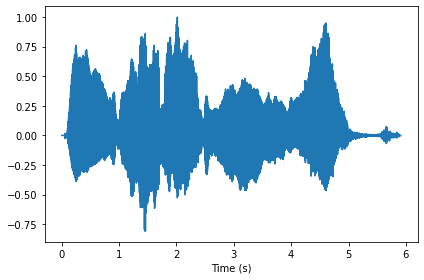

In [110]:
wave = read_wave(audio_file)
wave.plot()

imported_audio = wave.make_audio()
display(imported_audio)
decorate(xlabel='Time (s)')

In [111]:
def filter_wave(wave, start, duration, cutoff, cutoff_high):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.high_pass(cutoff_high)
    spectrum.plot(color='#045a8d')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [112]:
import numpy as np

In [113]:
from operator import mul
from functools import reduce
from math import exp
from math import floor

## Echo hinzufügen
Mithilfe dieses Tools ist es möglich einen Echo effekt zu erzeugen.
Es kann dabei entschieden werden wie weit sich der jeweilige "Echo-Reflektor" entfernt befindet.
Je weiter der Reflektor entfernt ist, desto leiser kommt das Echo zurück. Weiters wird das Echo auch immer leiser, je weiter es "reisen" muss. 

ipywidgets controls

In [114]:
def add_echo(wave, distance, echo_decay,):
    
    if distance < 1:
        wave.plot()
        display(wave.make_audio())
        return
    else:
        echo_data = (wave.ys)
        echo_time = (wave.ts)
        framerate = (wave.framerate)
        
        time_delay = distance * 2 / 343.2
        delay = floor(framerate * time_delay)
        zeros = np.zeros(delay) # Verzögerung
        audio_echo = np.concatenate([zeros, echo_data]) # verzögertes Audiosignal
        audio_out = np.concatenate([echo_data, zeros]) # orignal + Leerzeit für Echo

        # test = np.copy(audio_out)
        # test = np.ones(audio_out.size) / 10
        # test
        # audio_echo = np.multiply(wave.ys, test)

        #delay
        if echo_decay == 1:
            faktor = 0;
        elif echo_decay == 2:
            faktor = max(1-time_delay*0.5, 0)
        elif echo_decay == 3:
            faktor = exp(-time_delay*0.5)
        else:
            print("Wrong Value!")
            return

        wave.ys = audio_out + (audio_echo * faktor) # addieren
        wave.ts = np.arange(0, wave.ts[-1] + (time_delay), 1/48000) # np.arange(start, end, step)

        wave.plot()
        display(wave.make_audio())
        return

In [121]:
echo_decay = widgets.Dropdown(
            options=[('Never', 1), ('Linear', 2), ('Exponential', 3)],
            value=2,
            description='Reduction:',
        )
echo_decay

Dropdown(description='Reduction:', index=1, options=(('Never', 1), ('Linear', 2), ('Exponential', 3)), value=2…

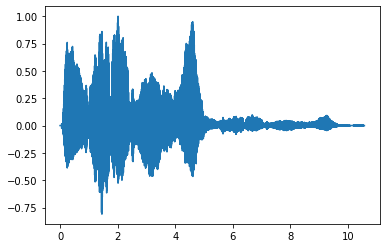

In [123]:
wave = read_wave(audio_file)
add_echo(wave, 800, echo_decay.value)

## Note

https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#File-Upload

scale

def make_wave(self, duration=1, start=0, framerate=11025):
        n = round(duration * framerate)
        ts = start + np.arange(n) / framerate
        ys = self.evaluate(ts)
        return Wave(ys, ts, framerate=framerate)

audio_echo = np.concatenate([zeros, echo_data])
zeros= np.zeros(framerate)

uploader = widgets.FileUpload()

display(uploader)

uploaded_file = uploader.value[0]
uploaded_file

uploaded_file = uploader.value
#=> 36

with open("./saved-output.wav", "wb") as fp:
    fp.write(uploaded_file.content)

uploaded_file['value']

wave = read_wave(uploaded_file)

uploader = widgets.FileUpload()

display(uploader)uploaded_file = uploader.value[0]
uploaded_fileuploaded_file = uploader.value
#=> 36with open("./saved-output.wav", "wb") as fp:
    fp.write(uploaded_file.content)uploaded_file['value']wave = read_wave(uploaded_file)